<a href="https://colab.research.google.com/github/Putra1688/2341720248_ML_2025/blob/main/JS04/TP_JS04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🗃️ **JS04 - Klustering**

## **TUGAS PRAKTIKUM**

### Tugas **K-Means**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning/Pertemuan 5/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Fitur yang dipilih :

*   Annual Income
*   Spending Score

Karena kombinasi keduanya memberikan wawasan bisnis yang paling relevan dan dapat ditindaklanjuti (actionable) untuk segmentasi pelanggan di sebuah mal


In [ ]:
X = df.iloc[:, [3, 4]].values

Elbow Method, yang merupakan cara paling umum untuk membantu Anda menentukan jumlah cluster (k) terbaik secara visual

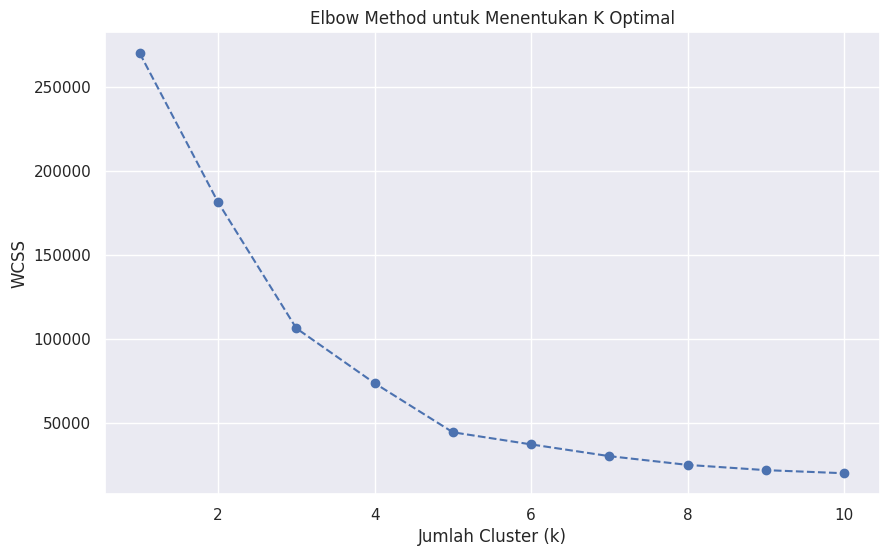

In [ ]:
# List untuk menyimpan nilai WCSS (inertia) untuk setiap k
wcss = []

# Loop untuk mencoba k dari 1 sampai 10
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_) # inertia_ adalah nilai WCSS

# Membuat plot Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method untuk Menentukan K Optimal')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

Membangun dan menjalankan model K-Means final menggunakan jumlah k terbaik (yaitu 5)

In [ ]:
# Menjalankan K-Means dengan k terbaik, yaitu 5
k_terbaik = 5
kmeans_final = KMeans(n_clusters=k_terbaik, init='k-means++', random_state=42, n_init=10)

# Melatih model dan memprediksi cluster untuk setiap data point
y_kmeans = kmeans_final.fit_predict(X)

# Menambahkan hasil cluster ke DataFrame asli untuk analisis (opsional)
df['Cluster'] = y_kmeans
print("\nData dengan Hasil Cluster:")
print(df.head())


Data dengan Hasil Cluster:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        4  
1        2  
2        4  
3        2  
4        4  


Membuat scatter plot untuk hasil clustering

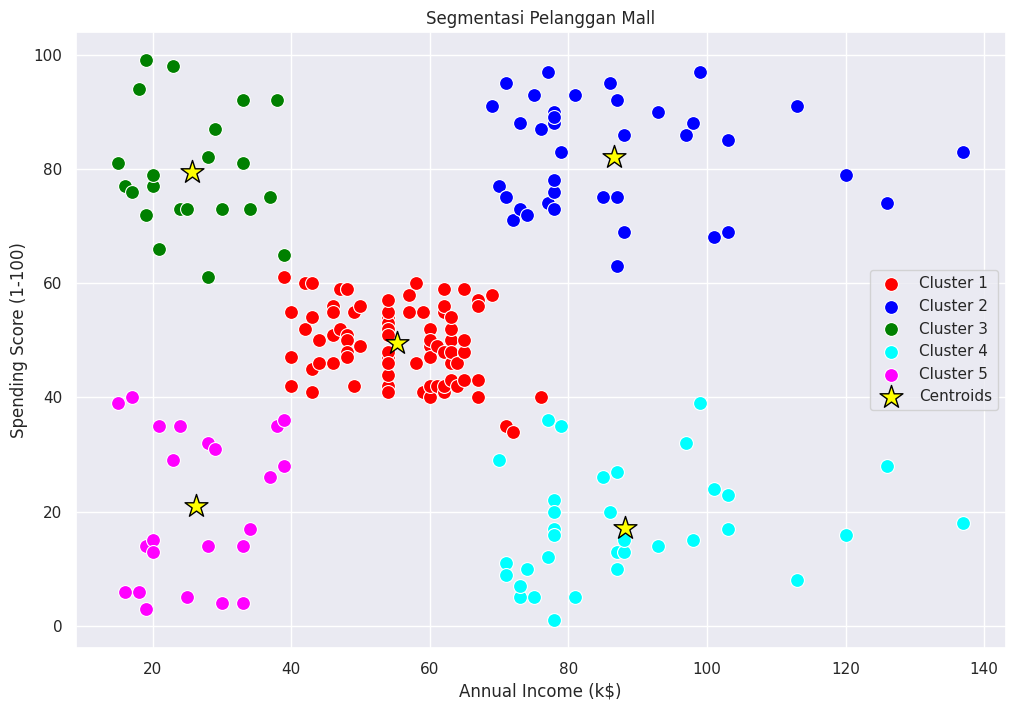

In [ ]:

plt.figure(figsize=(12, 8))
sns.scatterplot(x=X[y_kmeans == 0, 0], y=X[y_kmeans == 0, 1], color='red', label='Cluster 1', s=100)
sns.scatterplot(x=X[y_kmeans == 1, 0], y=X[y_kmeans == 1, 1], color='blue', label='Cluster 2', s=100)
sns.scatterplot(x=X[y_kmeans == 2, 0], y=X[y_kmeans == 2, 1], color='green', label='Cluster 3', s=100)
sns.scatterplot(x=X[y_kmeans == 3, 0], y=X[y_kmeans == 3, 1], color='cyan', label='Cluster 4', s=100)
sns.scatterplot(x=X[y_kmeans == 4, 0], y=X[y_kmeans == 4, 1], color='magenta', label='Cluster 5', s=100)

# Plot titik pusat (centroid) dari setiap cluster
plt.scatter(kmeans_final.cluster_centers_[:, 0], kmeans_final.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids', marker='*', edgecolors='black')

plt.title('Segmentasi Pelanggan Mall')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()

### Tugas **DBSCAN**

In [ ]:
X, labels_true = make_moons(n_samples=1000, noise=0.05, random_state=42)

# 2. Normalisasi data
# Ini penting agar parameter 'eps' bekerja secara konsisten
X = StandardScaler().fit_transform(X)

print("Dataset berhasil dibuat dan dinormalisasi.")
print("Bentuk data (X):", X.shape)

Dataset berhasil dibuat dan dinormalisasi.
Bentuk data (X): (1000, 2)


In [ ]:
# Menjalankan model DBSCAN
db = DBSCAN(eps=0.2, min_samples=5).fit(X)
labels = db.labels_

# Menghitung jumlah cluster (mengabaikan noise point, yaitu label -1)
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print(f"Estimasi Jumlah Cluster: {n_clusters_}")
print(f"Estimasi Jumlah Noise Points: {n_noise_}")
print("-" * 30)

# Evaluasi Kualitas Clustering
print(f"Homogeneity: {metrics.homogeneity_score(labels_true, labels):.3f}")
print(f"Completeness: {metrics.completeness_score(labels_true, labels):.3f}")
print(f"V-measure: {metrics.v_measure_score(labels_true, labels):.3f}")
print(f"Adjusted Rand Index (ARI): {metrics.adjusted_rand_score(labels_true, labels):.3f}")
print(f"Adjusted Mutual Information (AMI): {metrics.adjusted_mutual_info_score(labels_true, labels):.3f}")
print(f"Silhouette Coefficient: {metrics.silhouette_score(X, labels):.3f}")

Estimasi Jumlah Cluster: 2
Estimasi Jumlah Noise Points: 0
------------------------------
Homogeneity: 1.000
Completeness: 1.000
V-measure: 1.000
Adjusted Rand Index (ARI): 1.000
Adjusted Mutual Information (AMI): 1.000
Silhouette Coefficient: 0.391


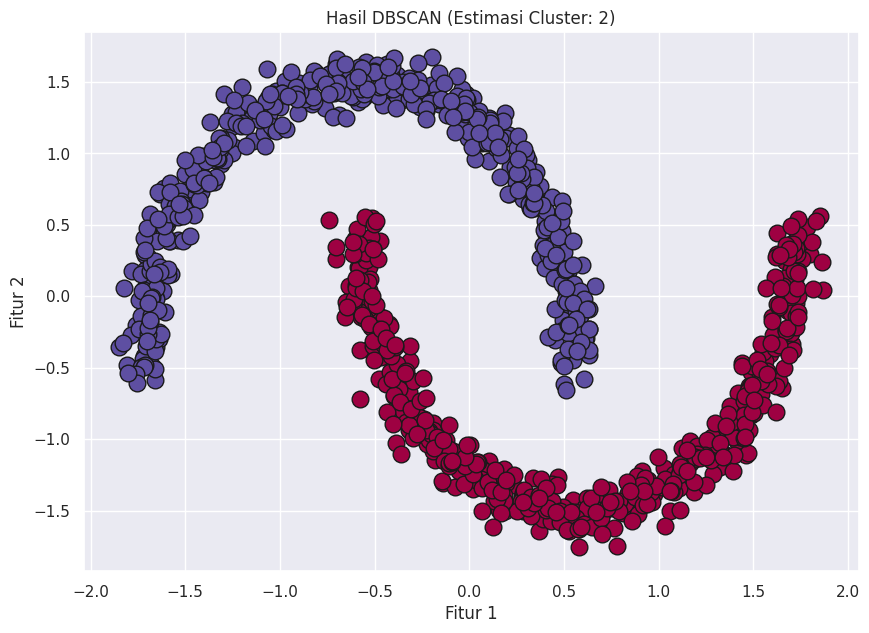

In [ ]:
# Membuat mask untuk membedakan core samples
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

plt.figure(figsize=(10, 7))

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Warna hitam untuk noise
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    # Plot core samples (titik besar)
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], "o", markerfacecolor=tuple(col), markeredgecolor="k", markersize=12)

    # Plot non-core samples (titik kecil)
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], "o", markerfacecolor=tuple(col), markeredgecolor="k", markersize=6)

plt.title(f'Hasil DBSCAN (Estimasi Cluster: {n_clusters_})')
plt.xlabel("Fitur 1")
plt.ylabel("Fitur 2")
plt.grid(True)
plt.show()

In [ ]:
# List parameter untuk diuji
eps_list = [0.05, 0.1, 0.2, 0.3, 0.5]
min_samples_list = [3, 5, 10, 20]

# Wadah untuk menyimpan hasil
results = []

print("Memulai eksperimen...")
for eps in eps_list:
    for min_samples in min_samples_list:
        # Jalankan DBSCAN
        db = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
        labels = db.labels_

        # Hitung jumlah cluster dan noise
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)

        # Hitung metrik evaluasi (hindari error jika hanya 1 cluster)
        if n_clusters_ > 1:
            silhouette = metrics.silhouette_score(X, labels)
        else:
            silhouette = -1 # Nilai default jika silhouette tidak bisa dihitung

        # Simpan hasil
        results.append({
            'eps': eps,
            'min_samples': min_samples,
            'n_clusters': n_clusters_,
            'n_noise': n_noise_,
            'Silhouette': silhouette,
            'V-measure': metrics.v_measure_score(labels_true, labels),
            'ARI': metrics.adjusted_rand_score(labels_true, labels)
        })

# Konversi hasil ke DataFrame Pandas untuk tampilan yang rapi
results_df = pd.DataFrame(results)

print("Eksperimen selesai.")
results_df

Memulai eksperimen...
Eksperimen selesai.


,eps,min_samples,n_clusters,n_noise,Silhouette,V-measure,ARI
0,0.05,3,69,186,0.112929,0.257021,0.030044
1,0.05,5,61,386,-0.048518,0.224021,0.015642
2,0.05,10,3,970,-0.294190,0.049389,0.002283
3,0.05,20,0,1000,-1.000000,0.000000,0.000000
4,0.10,3,2,14,0.251690,0.942714,0.972179
5,0.10,5,3,19,0.290689,0.769420,0.758440
6,0.10,10,7,57,0.162306,0.571132,0.523399
7,0.10,20,6,850,-0.360195,0.154693,0.016754
8,0.20,3,2,0,0.391160,1.000000,1.000000
9,0.20,5,2,0,0.391160,1.000000,1.000000
